In [ ]:
!python -m pip install --upgrade setuptools
!pip install git+https://github.com/tky823/ssspy.git@feature/iva-ipa
# or !pip install git+https://github.com/tky823/ssspy.git@017186e

In [2]:
import numpy as np
import scipy.signal as ss
import matplotlib.pyplot as plt
import IPython.display as ipd

In [3]:
from ssspy.utils.dataset import download_sample_speech_data

In [4]:
n_sources = 3
max_duration = 10
sisec2010_tag = "dev1_female3"
n_fft, hop_length = 4096, 2048

In [5]:
waveform_src_img, sample_rate = download_sample_speech_data(
    n_sources=n_sources,
    sisec2010_tag=sisec2010_tag,
    max_duration=max_duration,
    conv=True,
)  # (n_channels, n_sources, n_samples)
waveform_mix = np.sum(waveform_src_img, axis=1)  # (n_channels, n_samples)

In [6]:
for idx, waveform in enumerate(waveform_mix):
    print("Mixture: {}".format(idx + 1))
    display(ipd.Audio(waveform, rate=sample_rate))
    print()

Mixture: 1



Mixture: 2



Mixture: 3


In [7]:
from ssspy.bss.iva import AuxLaplaceIVA

In [8]:
iva = AuxLaplaceIVA(
    spatial_algorithm="IPA",
    newton_iter=10,
)
print(iva)

AuxIVA(spatial_algorithm=IPA, scale_restoration=True, record_loss=True, reference_id=0)


In [9]:
_, _, spectrogram_mix = ss.stft(waveform_mix, window="hann", nperseg=n_fft, noverlap=n_fft-hop_length)

In [10]:
spectrogram_est = iva(spectrogram_mix, n_iter=100)

/usr/local/lib/python3.9/dist-packages/ssspy/linalg/lqpqm.py:191: UserWarning: Newton-Raphson method did not converge in 10 iterations.
  warnings.warn(


In [11]:
_, waveform_est = ss.istft(spectrogram_est, window="hann", nperseg=n_fft, noverlap=n_fft-hop_length)

In [12]:
for idx, waveform in enumerate(waveform_est):
    print("Estimated source: {}".format(idx + 1))
    display(ipd.Audio(waveform, rate=sample_rate))
    print()

Estimated source: 1



Estimated source: 2



Estimated source: 3


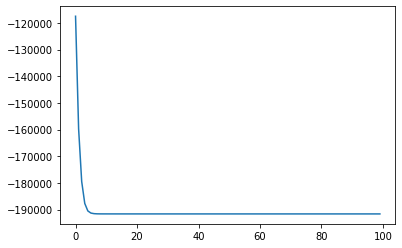

In [13]:
plt.figure()
plt.plot(iva.loss[1:])
plt.show()
plt.close()